## Cardiovascular disease prediction

According to the World Health Organization (WHO), cardiovascular diseases (CVDs) remain among the leading causes of death, repsesenting 32 % of death globally. Cardiovascular diseases development is commonly linked to multiple risk factors, most of which stem from an unhealthy lifestyle, including smoking, obesity and physical inactivity. The early detection of CVDs is crucial for effective treatment and prevention of diseases. <br>

The objective of this project is to identify key factors contributing to the development of cardiovascular diseases (CDVs) and to develop a robust machine learning model for predicting CVDs risk. Through comprehensive data analysis, this project seeks to uncover valuable insights that highlight the associations between various risk factors and onset of CVDs. The ultimate aim is to assist in the early detection and prevention of CVDs by identifying these associations. <br>

This analysis is conducted using a publicly available dataset from Kaggle, consisting of 70 000 records, each characterized by 12 features and 1 target variable. During the feature engineering phase, certain samples are removed to eliminate errors resulting from data anomalies, while others are discarded due to their irrelevance to the analysis.

### 1. Exploratory data analysis
-------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import utils

cardio = pd.read_csv("cardio_train.csv",sep=';')
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [3]:
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<br><br> **Summary:**<br>

The dataset contains no missing values. However, the descriptive statistics reveal a high dispersion in **'ap_hi'(systolic)** and **'ap_lo'(diastolic)** values, suggesting the presence of extreme values. These outliers can potentially compromise data accuracy and quality, leading to skewed analysis and misleading conclusions. 

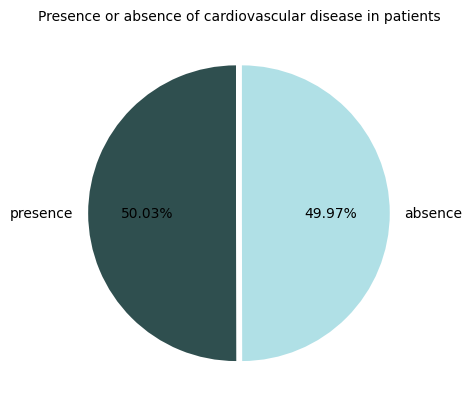

In [4]:
utils.plot_presence_absence(cardio);

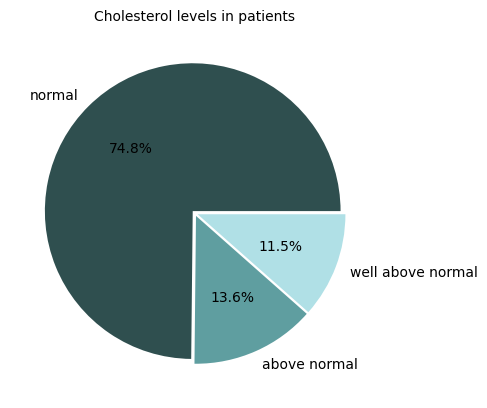

In [5]:
utils.plot_cholesterol_levels(cardio);

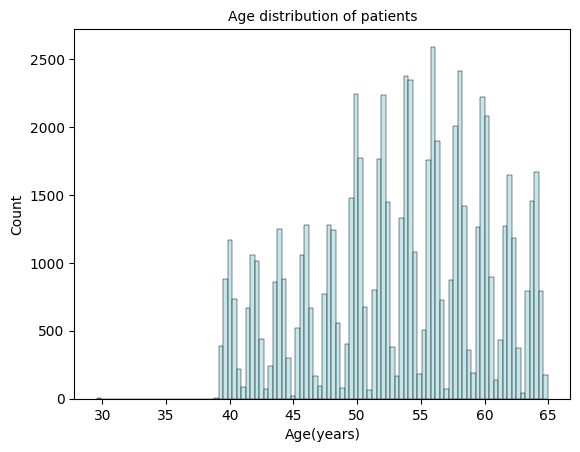

In [6]:
utils.plot_age_distribution(cardio);

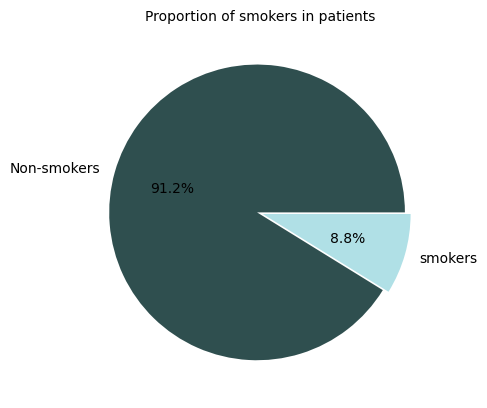

In [7]:
utils.plot_proportion_smokers(cardio);

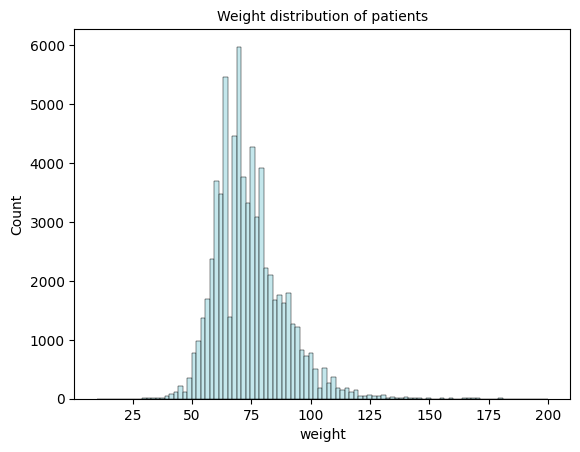

In [8]:
utils.plot_weight_distribution(cardio);

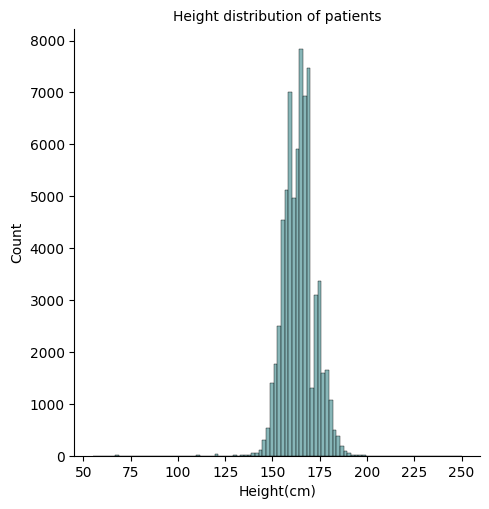

In [9]:
utils.plot_height_distribution(cardio);

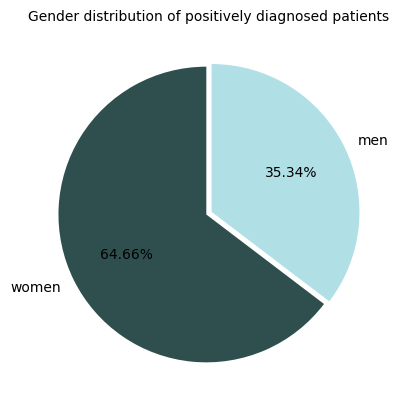

In [10]:
utils.plot_gender_distribution(cardio);

<br><br> **Summary:**<br>
1. Of 70 000 patients, the percentage diagnosed with cardiovascular disease is slightly higher than of those without diagnosis.<br>
2. Most patients have normal cholesterol levels.<br>
3. The medical examination was conducted on patients predominantly belonging to the 40-65 age group.<br>
4. Of 70 000 patients, the proportion of smokers is significantly lower than that of non-smokers.<br>
5. Weight and height values alone provide limited insights in the context of cardiovascular diseases. These values should be transformed into the BMI (Body Mass Index) for more meaningful analysis.<br>
6. The gender distribution of the patients diagnosed with CVDs is uneven, with men being underrepresented.

### 2. Feature engineering and Data visualization
-------------------------------------------------------------------------------------------------------------------------------------------------------------

Since weight and height values alone provide limited insights in the context of cardiovascular diseases, their values are transformed into the BMI for a more interpretable analysis. Additionally, a new feature **'bmi-class'** was created based on the World Health Organisation's classification. <br><br>
Since there is no formal upper limits for **Obesity (class III)**, its classification is relative and has been determined using the Interquantile Range (IQR) method. The goal was to filter out apparent outliers while retaining values that could plausibly represent natural variations. <br><br>
The same approach has been applied to **'ap_hi'(systolic)** and **'ap_lo'(diastolic)** values. A new feature **'pressure category'** was created based on Healthline's classification.

In [11]:
cardio['bmi'] = utils.calculate_bmi(cardio)
cardio = utils.remove_outliers(cardio,'bmi')
cardio['bmi_class'] = utils.create_bmi_class(cardio)
cardio.dropna(axis=0,inplace=True)
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_class
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,normal range
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0,obese(class I)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0,normal range
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0,overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,normal range


In [12]:
cardio = utils.remove_outliers(cardio,'ap_hi')
cardio = utils.remove_outliers(cardio, 'ap_lo')
filtered_cardio = utils.set_pressure_category(cardio)
filtered_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_class,pressure_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,normal range,healthy
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0,obese(class I),stage_2_hyper
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0,overweight,stage_2_hyper
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,normal range,healthy
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,29.0,overweight,healthy


#### Associations between risk factors and the onset of CVDs

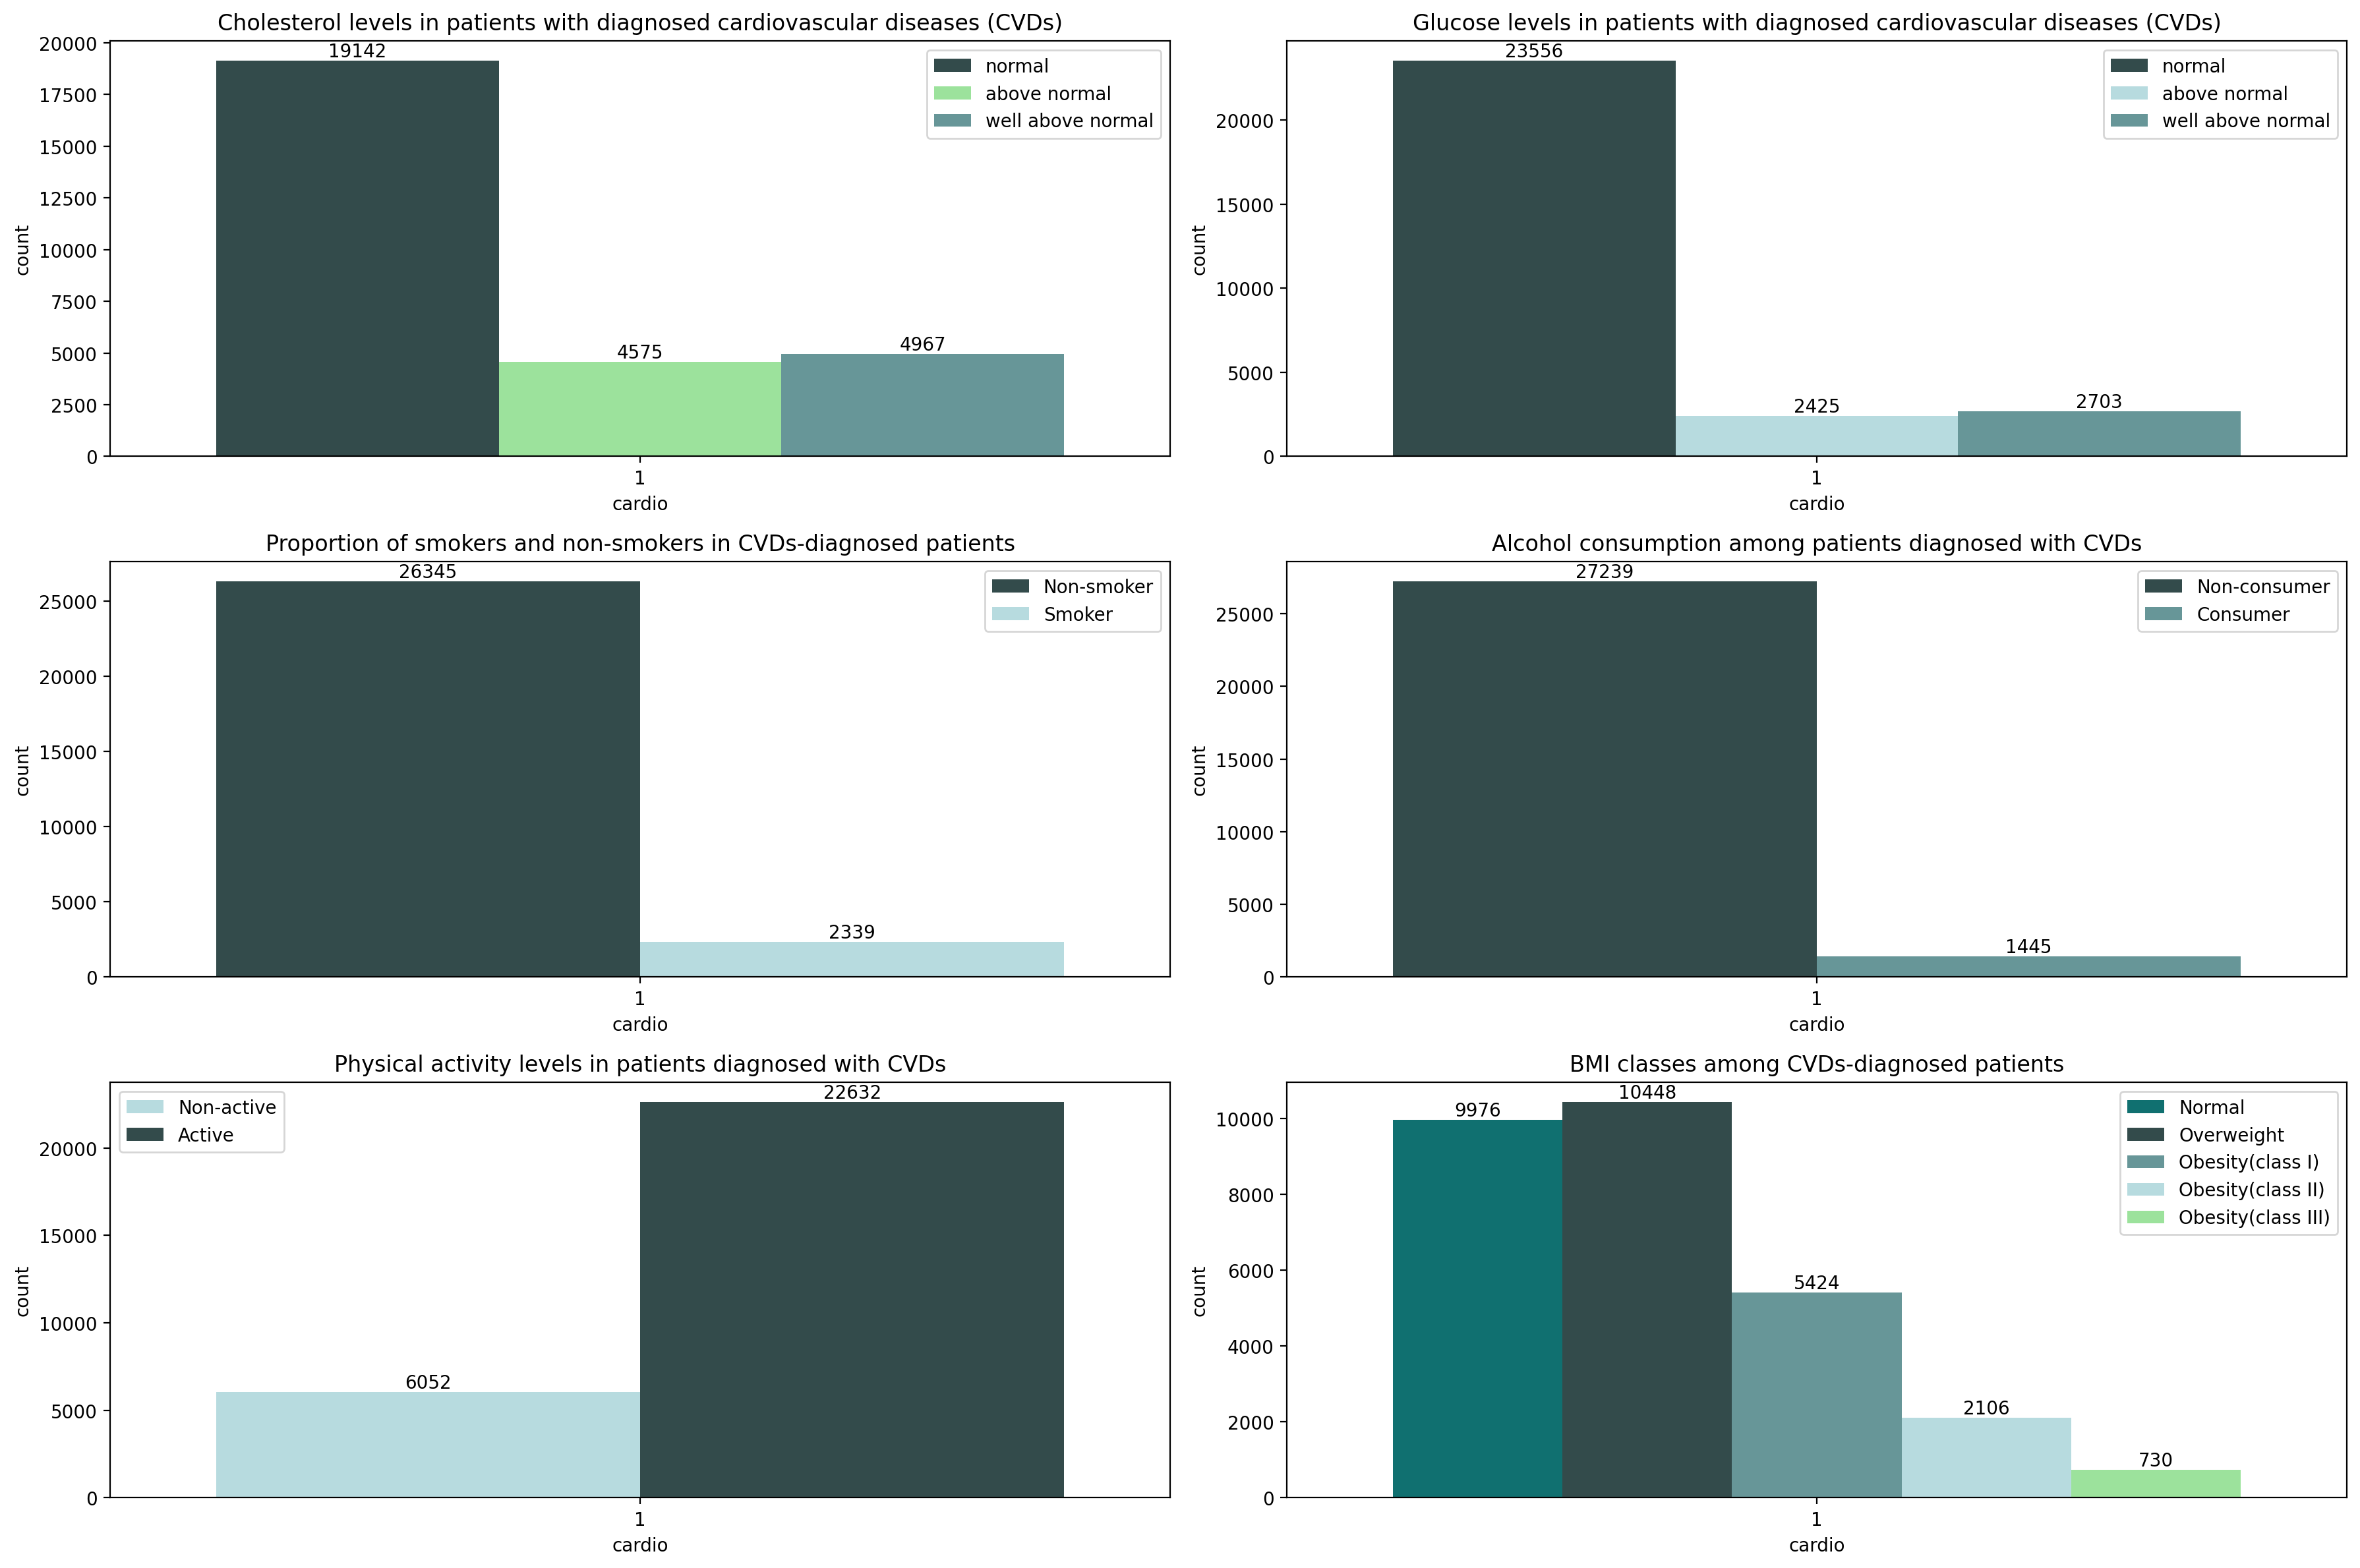

In [13]:
utils.plot_cardio_subplots(filtered_cardio);

<br><br> **Summary:**<br>
1. Cholesterol and glucose levels in patients diagnosed with CVDs are predominantly within the normal range.<br>
2. The majority of patients diagnosed with CVDs do not have smoking or alcohol consumption habits and are physically active.<br>
3. More than half CVDs-diagnosed patients fall into the 'normal' or 'overweight' BMI category.

#### The correlation matrix between risk factors and the onset of CVDs

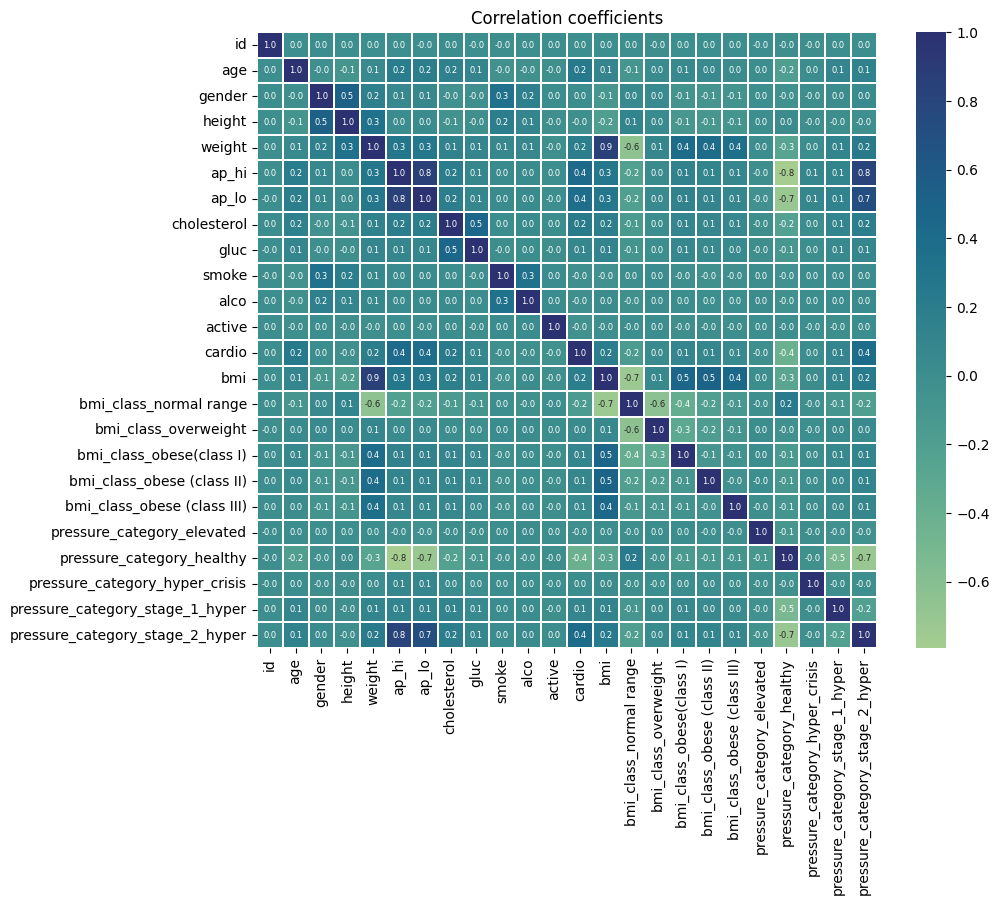

In [14]:
utils.plot_corr_matrix(filtered_cardio);

<br><br> **Summary:**<br>

The presence or absence of cardiovascular diseases (**'cardio'**) have a weak positive correlation with **'age'**, **'weight'** ,
**'cholesterol'** , **'bmi'**; a moderate positive correlation with **'ap_hi'(systolic)**, **'ap_lo'(diastolic)**, **'pressure_category_stage_2_hyper'**; a weak negative correlation with **'bmi_class_normal_range'** and a moderate negative correlation with **'pressure_category_healthy'**.<br><br>

However, since the **'cardio'** is a single binary feature representing both presence or absence of diagnosis, the correlation coefficients reflects only  the overall relationship without distinguishing between two groups, which may lead to misleading interpretations.


### 3. Model selection
-------------------------------------------------------------------------------------------------------------------------------------------------------------

In [15]:
cardio_1, cardio_2 = utils.create_dataset(filtered_cardio)
cardio_1.head()

,id,age,cholesterol,gluc,smoke,alco,active,cardio,bmi_class_overweight,bmi_class_obese(class I),bmi_class_obese (class II),bmi_class_obese (class III),pressure_category_healthy,pressure_category_hyper_crisis,pressure_category_stage_1_hyper,pressure_category_stage_2_hyper,gender_2
0,0,18393,1,1,0,0,1,0,False,False,False,False,True,False,False,False,True
1,1,20228,3,1,0,0,1,1,False,True,False,False,False,False,False,True,False
3,3,17623,1,1,0,0,1,1,True,False,False,False,False,False,False,True,True
4,4,17474,1,1,0,0,0,0,False,False,False,False,True,False,False,False,False
5,8,21914,2,2,0,0,0,0,True,False,False,False,True,False,False,False,False


              precision    recall  f1-score   support

           0       0.70      0.83      0.76      5251
           1       0.76      0.61      0.68      4726

    accuracy                           0.72      9977
   macro avg       0.73      0.72      0.72      9977
weighted avg       0.73      0.72      0.72      9977

Accuracy: 0.725
Best parameters: {'memory': None, 'steps': [('scaler', StandardScaler()), ('log', LogisticRegression(l1_ratio=0.47368421052631576, max_iter=10000,
                   penalty='elasticnet', solver='saga'))], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'log': LogisticRegression(l1_ratio=0.47368421052631576, max_iter=10000,
                   penalty='elasticnet', solver='saga'), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'log__C': 1.0, 'log__class_weight': None, 'log__dual': False, 'log__fit_intercept': True, 'log__intercept_scaling': 1, 'log__l1_ratio': 0.47368421052631576, 'log__max_iter': 10

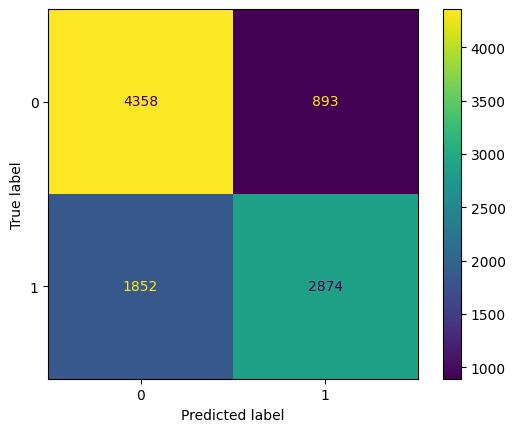

In [16]:
from model_selection import ModelSelection

ms = ModelSelection(cardio_1, 'cardio')
ms.logistic_regression

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      5251
           1       0.76      0.62      0.68      4726

    accuracy                           0.73      9977
   macro avg       0.73      0.72      0.72      9977
weighted avg       0.73      0.73      0.72      9977

Accuracy: 0.725
Best parameters: {'memory': None, 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=150))], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'knn': KNeighborsClassifier(n_neighbors=150), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 150, 'knn__p': 2, 'knn__weights': 'uniform'}


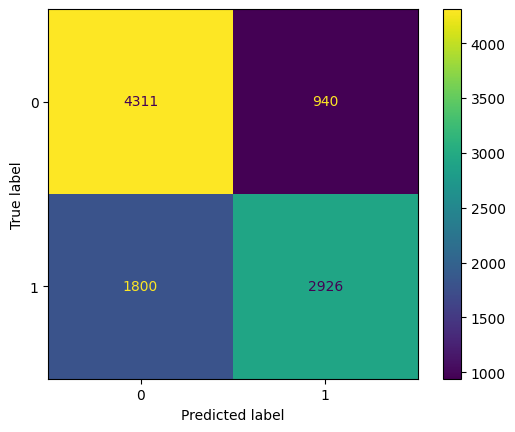

In [17]:
ms.KNN_model

In [18]:
ms.Bernoulli_Naive_Bayes

ValueError: Invalid parameter 'alpha' for estimator Pipeline(steps=[('scaler', StandardScaler()), ('nb', BernoulliNB())]). Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose'].

In [ ]:
ms.random_forrest

In [ ]:
cardio_2.head()

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,gender_2
0,0,18393,110,80,1,1,0,0,1,0,22.0,True
1,1,20228,140,90,3,1,0,0,1,1,35.0,False
3,3,17623,150,100,1,1,0,0,1,1,29.0,True
4,4,17474,100,60,1,1,0,0,0,0,23.0,False
5,8,21914,120,80,2,2,0,0,0,0,29.0,False


              precision    recall  f1-score   support

           0       0.71      0.81      0.76      5251
           1       0.76      0.64      0.69      4726

    accuracy                           0.73      9977
   macro avg       0.73      0.73      0.73      9977
weighted avg       0.73      0.73      0.73      9977

Accuracy: 0.730
Best parameters: {'memory': None, 'steps': [('scaler', StandardScaler()), ('log', LogisticRegression(l1_ratio=0.0, max_iter=10000, penalty='elasticnet',
                   solver='saga'))], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'log': LogisticRegression(l1_ratio=0.0, max_iter=10000, penalty='elasticnet',
                   solver='saga'), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'log__C': 1.0, 'log__class_weight': None, 'log__dual': False, 'log__fit_intercept': True, 'log__intercept_scaling': 1, 'log__l1_ratio': 0.0, 'log__max_iter': 10000, 'log__multi_class': 'deprecated', 'log__n_j

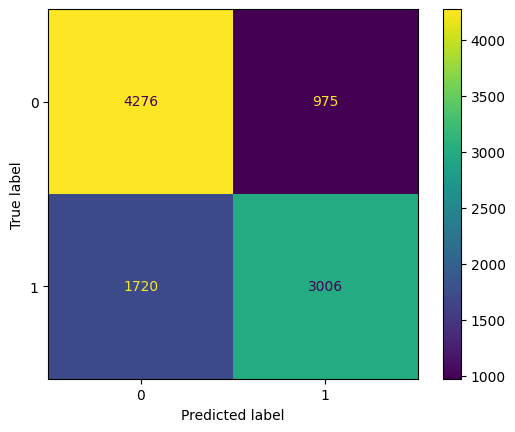

In [ ]:
ms = ModelSelection(cardio_2, 'cardio')
ms.logistic_regression

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      5251
           1       0.76      0.63      0.69      4726

    accuracy                           0.73      9977
   macro avg       0.73      0.72      0.72      9977
weighted avg       0.73      0.73      0.73      9977

Accuracy: 0.730
Best parameters: {'memory': None, 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=50))], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'knn': KNeighborsClassifier(n_neighbors=50), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 50, 'knn__p': 2, 'knn__weights': 'uniform'}


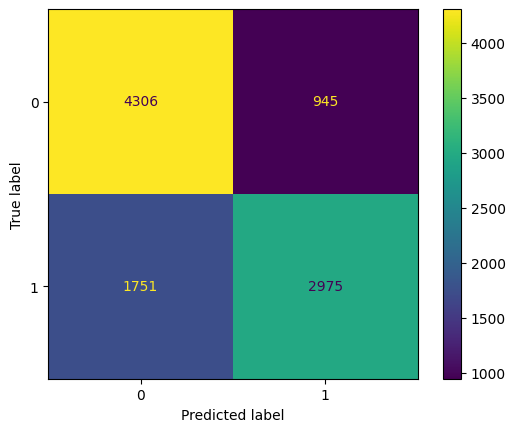

In [ ]:
ms.KNN_model

              precision    recall  f1-score   support

           0       0.54      0.84      0.66      5251
           1       0.52      0.19      0.28      4726

    accuracy                           0.53      9977
   macro avg       0.53      0.52      0.47      9977
weighted avg       0.53      0.53      0.48      9977

Accuracy: 0.535
Best parameters: {'alpha': 0.0001, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}


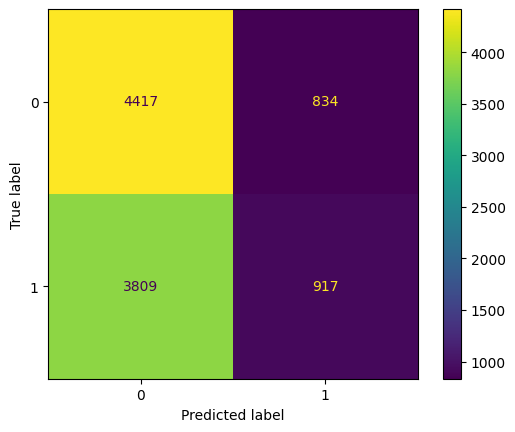

In [ ]:
ms.Bernoulli_Naive_Bayes

In [ ]:
ms.random_forrest